<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Pie Charts**


Estimated time needed: **30** minutes


- In this lab, you will focus on visualizing data.

- The provided dataset will be loaded into pandas for analysis.

- Various pie charts will be created to:
   - Analyze developer preferences.
  
   - Identify technology usage trends.
    
- The lab aims to provide insights into key variables using visual representations.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2026-02-17 20:34:37--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  42.3MB/s    in 3.6s    

2026-02-17 20:34:41 (42.2 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Composition with Pie Charts


##### 1.1 Create a Pie Chart of the Top 5 Databases Respondents Want to Work With


In the survey data, the `DatabaseWantToWorkWith` column lists the databases that respondents wish to work with. Let’s visualize the top 5 most-desired databases in a pie chart.



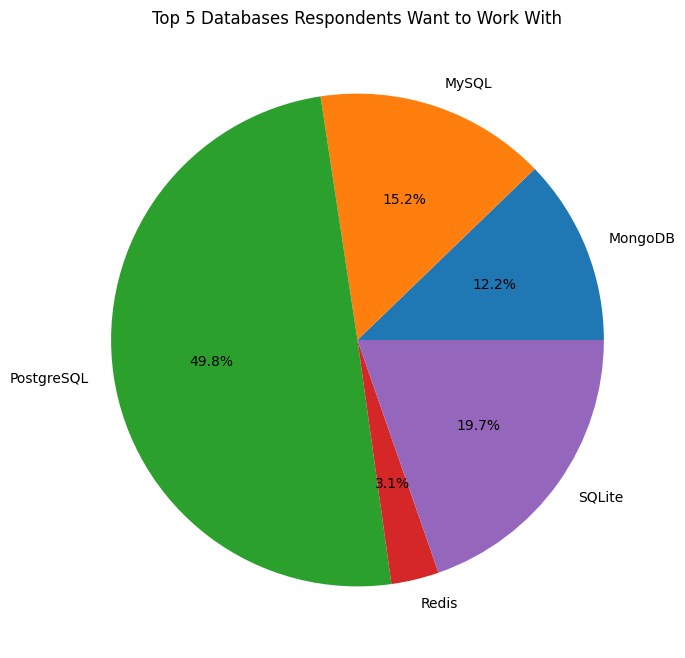

In [4]:
df_want = df[['DatabaseWantToWorkWith']]
df_want = df_want.dropna() # drop nulls

# top 5 databases
want_counts = (
    df_want["DatabaseWantToWorkWith"]
    .str.split(';')
    .explode()
    .str.strip()        # clean whitespace
    .value_counts()
    .head(5)
    .index
)

df_want = df_want[df_want['DatabaseWantToWorkWith'].isin(want_counts)] # restrict dataset to top 5 roles
df_want = df_want.groupby(["DatabaseWantToWorkWith"]).size().reset_index(name="count") # create counts and reset index
#df_want
#create pie chart
plt.figure(figsize=(8, 8))

plt.pie(
    df_want["count"],
    labels=df_want["DatabaseWantToWorkWith"],
    autopct="%1.1f%%", # add percentage
)

plt.title("Top 5 Databases Respondents Want to Work With")
plt.show()

The `DevType` column lists the developer types for respondents. We’ll examine the distribution by showing the top 5 developer roles in a pie chart.



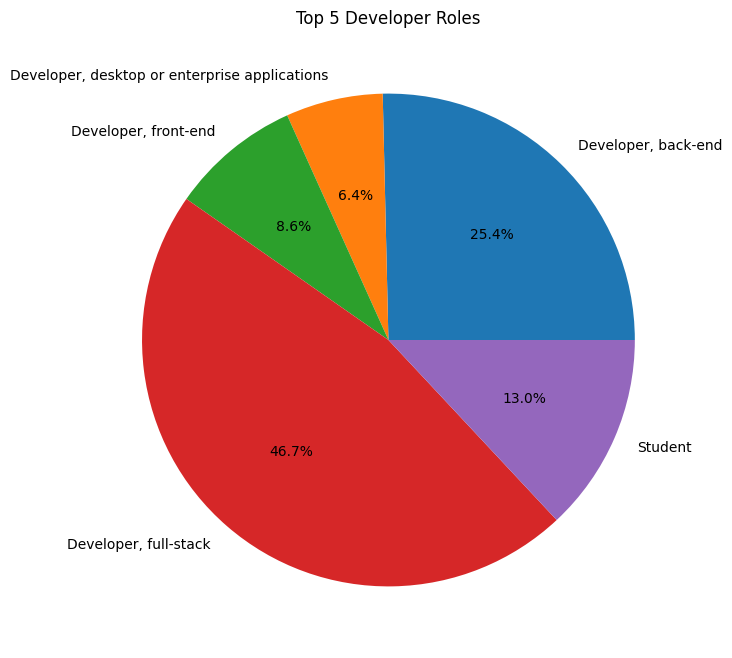

In [5]:
df_devtype = df[['DevType']]
df_devtype = df_devtype.dropna() # drop nulls

# top 5 developer roles
devtype_counts = (
    df_devtype['DevType']
    .str.split(';')
    .explode()
    .str.strip()        # clean whitespace
    .value_counts()
    .head(5)
    .index
)

df_devtype = df_devtype[df_devtype['DevType'].isin(devtype_counts)] # restrict dataset to top 5 roles
df_devtype = df_devtype.groupby(["DevType"]).value_counts(ascending=False).reset_index(name="count") # create counts and reset index

#create pie chart
plt.figure(figsize=(8, 8))

plt.pie(
    df_devtype["count"],
    labels=df_devtype["DevType"],
    autopct="%1.1f%%", # add percentage
)

plt.title("Top 5 Developer Roles")
plt.show()

##### 1.3 Create a pie chart for the operating systems used by respondents for professional use


The `OpSysProfessional` use column shows the operating systems developers use professionally. Let’s visualize the distribution of the top operating systems in a pie chart.



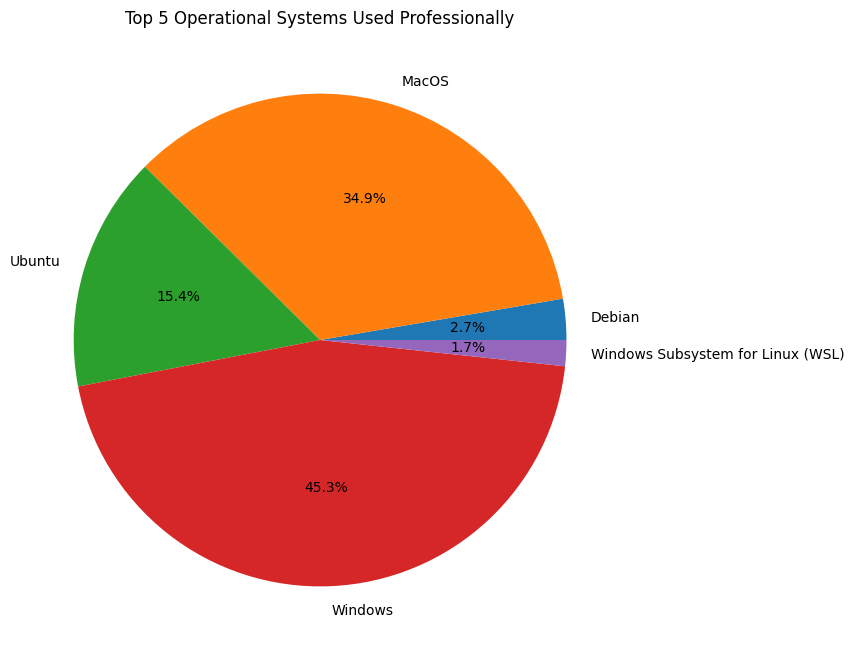

In [6]:
df_opsys = df[['OpSysProfessional use']]
df_opsys = df_opsys.dropna() # drop nulls

opsys_counts = (
    df_opsys['OpSysProfessional use']
    .str.split(';')
    .explode()
    .str.strip()        # clean whitespace
    .value_counts()
    .head(5)
    .index
)

df_opsys = df_opsys[df_opsys['OpSysProfessional use'].isin(opsys_counts)] # restrict dataset to top 5 roles
df_opsys = df_opsys.groupby(["OpSysProfessional use"]).size().reset_index(name="count") # create counts and reset index

#create pie chart
plt.figure(figsize=(8, 8))

plt.pie(
    df_opsys["count"],
    labels=df_opsys["OpSysProfessional use"],
    autopct="%1.1f%%", # add percentage
)

plt.title("Top 5 Operational Systems Used Professionally")
plt.show()

### Task 2: Additional Visualizations and Comparisons


##### 2.1 Pie Chart for Top 5 Programming Languages Respondents Have Worked With


The `LanguageHaveWorkedWith` column contains the programming languages that respondents have experience with. We’ll plot a pie chart to display the composition of the top 5 languages.



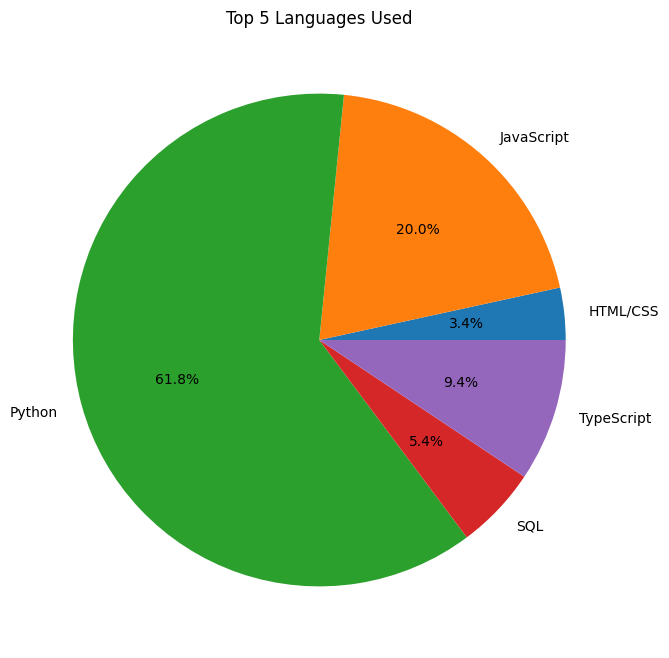

In [7]:
df_lang_used = df[['LanguageHaveWorkedWith']]
df_lang_used = df_lang_used.dropna() # drop nulls

lang_used_counts = (
    df_lang_used['LanguageHaveWorkedWith']
    .str.split(';')
    .explode()
    .str.strip()        # clean whitespace
    .value_counts()
    .head(5)
    .index
)

df_lang_used = df_lang_used[df_lang_used['LanguageHaveWorkedWith'].isin(lang_used_counts)] # restrict dataset to top 5 roles
df_lang_used = df_lang_used.groupby(["LanguageHaveWorkedWith"]).size().reset_index(name="count") # create counts and reset index

#create pie chart
plt.figure(figsize=(8, 8))

plt.pie(
    df_lang_used["count"],
    labels=df_lang_used["LanguageHaveWorkedWith"],
    autopct="%1.1f%%", # add percentage
)

plt.title("Top 5 Languages Used")
plt.show()

##### 2.2 Pie Chart for Top Collaboration Tools used in Professional Use


Using the `NEWCollabToolsHaveWorkedWith` column, we’ll identify and visualize the top collaboration tools respondents use in their professional work.



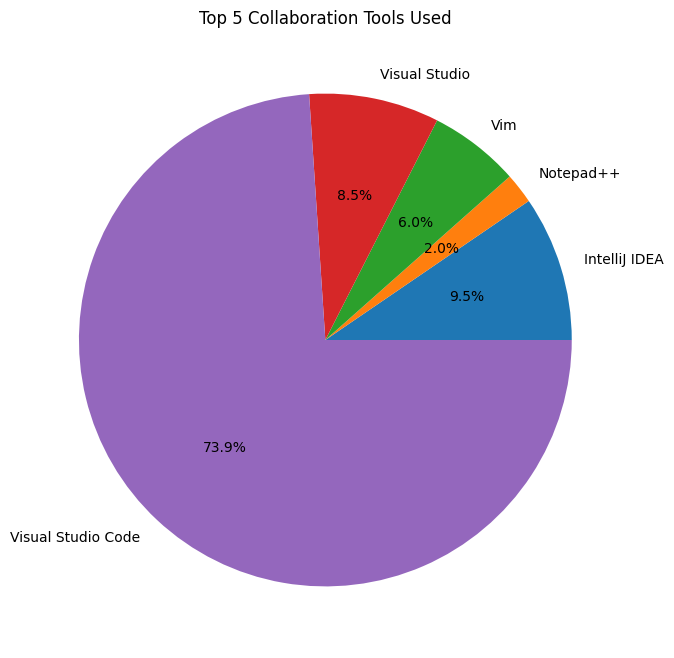

In [8]:
df_collab_tool = df[['NEWCollabToolsHaveWorkedWith']]
df_collab_tool = df_collab_tool.dropna() # drop nulls

collab_tool_counts = (
    df_collab_tool['NEWCollabToolsHaveWorkedWith']
    .str.split(';')
    .explode()
    .str.strip()        # clean whitespace
    .value_counts()
    .head(5)
    .index
)

df_collab_tool = df_collab_tool[df_collab_tool['NEWCollabToolsHaveWorkedWith'].isin(collab_tool_counts)] # restrict dataset to top 5 roles
df_collab_tool = df_collab_tool.groupby(["NEWCollabToolsHaveWorkedWith"]).size().reset_index(name="count") # create counts and reset index

#create pie chart
plt.figure(figsize=(8, 8))

plt.pie(
    df_collab_tool["count"],
    labels=df_collab_tool["NEWCollabToolsHaveWorkedWith"],
    autopct="%1.1f%%", # add percentage
)

plt.title("Top 5 Collaboration Tools Used")
plt.show()

### Task 3: Analyzing and Interpreting Composition


In this task, you will create additional pie charts to analyze specific aspects of the survey data. Use `pandas` and `matplotlib` to complete each task and interpret the findings.



##### 3.1 Pie Chart of `Respondents` Most Admired Programming Languages


The `LanguageAdmired` column lists the programming languages respondents admire most. Create a pie chart to visualize the top 5 admired languages.



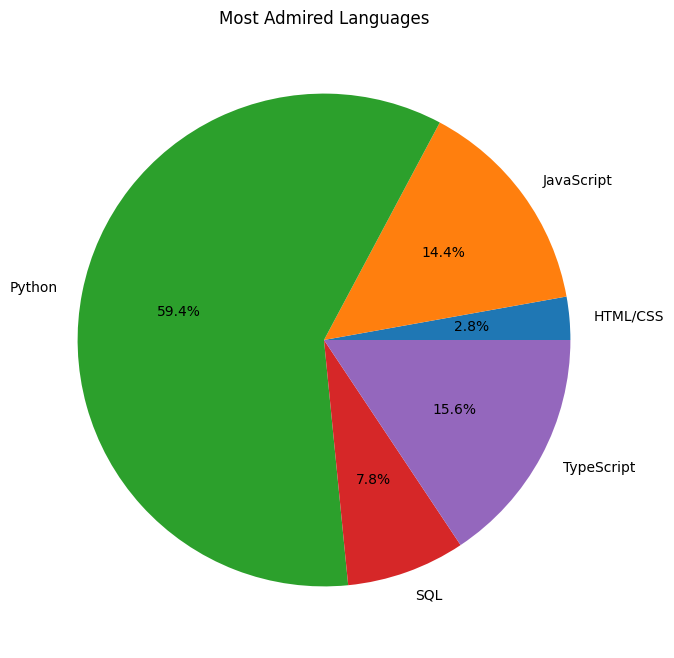

In [9]:
df_admired = df[['LanguageAdmired']]
df_admired = df_admired.dropna() # drop nulls

admired_counts = (
    df_admired['LanguageAdmired']
    .str.split(';')
    .explode()
    .str.strip()        # clean whitespace
    .value_counts()
    .head(5)
    .index
)

df_admired = df_admired[df_admired['LanguageAdmired'].isin(admired_counts)] # restrict dataset to top 5 roles
df_admired = df_admired.groupby(["LanguageAdmired"]).size().reset_index(name="count") # create counts and reset index

# create pie chart
plt.figure(figsize=(8, 8))

plt.pie(
    df_admired["count"],
    labels=df_admired["LanguageAdmired"],
    autopct="%1.1f%%", # add percentage
)

plt.title("Most Admired Languages")
plt.show()

##### 3.2 Pie Chart of Tools Used for AI Development


Using the `AIToolCurrently` Using column, create a pie chart to visualize the top 5 tools developers are currently using for AI development.



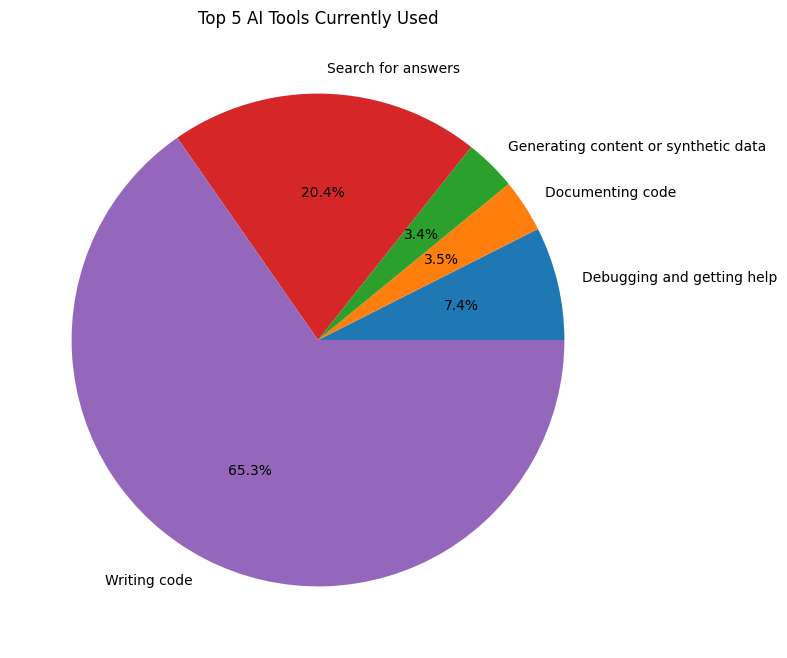

In [10]:
df_AI = df[['AIToolCurrently Using']]
df_AI = df_AI.dropna() # drop nulls

AI_counts = (
    df_AI['AIToolCurrently Using']
    .str.split(';')
    .explode()
    .str.strip()        # clean whitespace
    .value_counts()
    .head(5)
    .index
)

df_AI = df_AI[df_AI['AIToolCurrently Using'].isin(AI_counts)] # restrict dataset to top 5 roles
df_AI = df_AI.groupby(["AIToolCurrently Using"]).size().reset_index(name="count") # create counts and reset index

# create pie chart
plt.figure(figsize=(8, 8))

plt.pie(
    df_AI["count"],
    labels=df_AI["AIToolCurrently Using"],
    autopct="%1.1f%%", # add percentage
)

plt.title("Top 5 AI Tools Currently Used")
plt.show()

##### 3.3 Pie Chart for Preferred Web Frameworks


The `WebframeWantToWorkWith` column includes web frameworks that respondents are interested in working with. Visualize the top 5 frameworks in a pie chart.



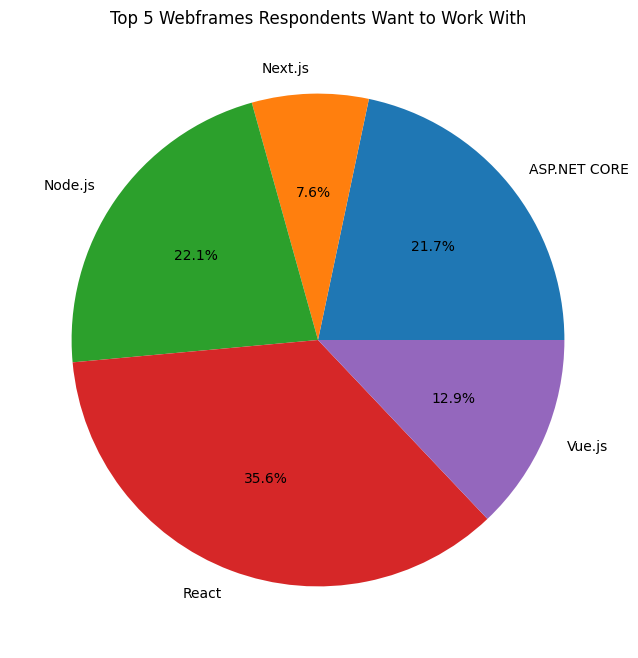

In [11]:
df_wf_want = df[['WebframeWantToWorkWith']]
df_wf_want = df_wf_want.dropna() # drop nulls

wf_want_counts = (
    df_wf_want['WebframeWantToWorkWith']
    .str.split(';')
    .explode()
    .str.strip()        # clean whitespace
    .value_counts()
    .head(5)
    .index
)

df_wf_want = df_wf_want[df_wf_want['WebframeWantToWorkWith'].isin(wf_want_counts)] # restrict dataset to top 5 roles
df_wf_want = df_wf_want.groupby(["WebframeWantToWorkWith"]).size().reset_index(name="count") # create counts and reset index

# create pie chart
plt.figure(figsize=(8, 8))

plt.pie(
    df_wf_want["count"],
    labels=df_wf_want["WebframeWantToWorkWith"],
    autopct="%1.1f%%", # add percentage
)

plt.title("Top 5 Webframes Respondents Want to Work With")
plt.show()

##### 3.4 Pie Chart for Most Desired Embedded Technologies


Using the `EmbeddedWantToWorkWith` column, create a pie chart to show the top 5 most desired embedded technologies that respondents wish to work with.



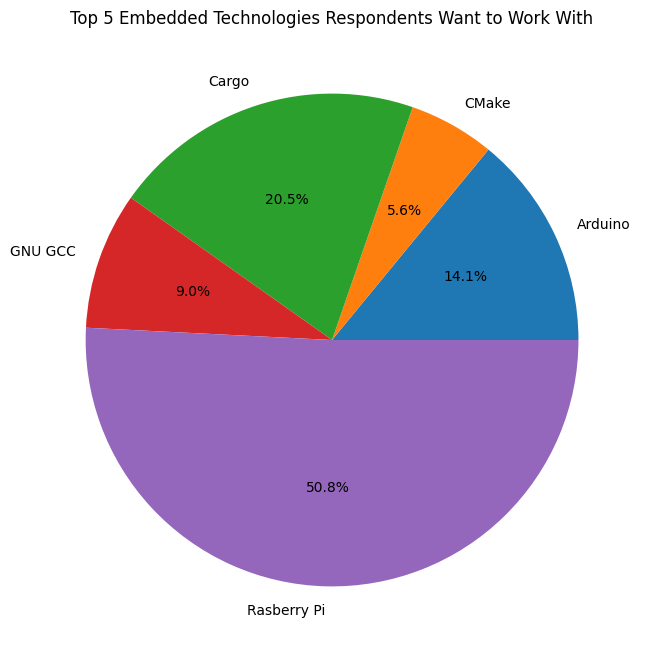

In [12]:
df_embed_want = df[['EmbeddedWantToWorkWith']]
df_embed_want = df_embed_want.dropna() # drop nulls

embed_want_counts = (
    df_embed_want['EmbeddedWantToWorkWith']
    .str.split(';')
    .explode()
    .str.strip()        # clean whitespace
    .value_counts()
    .head(5)
    .index
)

df_embed_want = df_embed_want[df_embed_want['EmbeddedWantToWorkWith'].isin(embed_want_counts)] # restrict dataset to top 5 roles
df_embed_want = df_embed_want.groupby(["EmbeddedWantToWorkWith"]).size().reset_index(name="count") # create counts and reset index

# create pie chart
plt.figure(figsize=(8, 8))

plt.pie(
    df_embed_want["count"],
    labels=df_embed_want["EmbeddedWantToWorkWith"],
    autopct="%1.1f%%", # add percentage
)

plt.title("Top 5 Embedded Technologies Respondents Want to Work With")
plt.show()

### Summary


After completing this lab, you will be able to:
- Create pie charts to visualize developer preferences across databases, programming languages, AI tools, and cloud platforms.
- Identify trends in technology usage, role distribution, and tool adoption through pie charts.
- Analyze and compare data composition across various categories to gain insights into developer preferences.




## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
